*   DOMAIN: DATA ANALYTICS

      *   TASK 1: WEB SCRAPING
      *   Project Title : Book Price Analysis using Web Scraping





*   Data Analytics Project Task 1: Web scraping:

    1)Use Python libraries like BeautifulSoap or Scrapy to extract data from websites.

    2)Identify and collect relevant datasets from public web pages.

    3)If you don't code , use automated tools like Octoparse or ParseHub.

    4)Learn to handle HTML structure and web navigation to gather accurate data.

    5)Create custom datasets tailored to specific analysis needs.

**1) Introduction**

Web scraping is a technique used to extract data from websites automatically.
In this project, we scraped book-related data from a public practice website:

👉 http://books.toscrape.com/

The collected data was cleaned, structured, and analyzed to derive meaningful insights.

In [ ]:
# Install Required Libraries
pip install requests beautifulsoup4 pandas


**2) Objective**

      The main objectives of this project are:

*   Extract book data from a website using Python
*   Create a structured dataset   
*   Perform data cleaning and transformation
*   Analyze price and rating distribution
*   Generate insights using visualization  

**3) Tools & Technologies Used**

    1.   Python
    2.   Requests
    3.   BeautifulSoup
    4.   Pandas
    5.   Matplotlib
    6.   Google Colab / Jupyter Notebook

**4) Data Collection (Web Scraping)**

  Fields Extracted:

    1.Book Title

    2.Price

    3.Rating
    
    4.Availability

In [ ]:
# Scraping Code (Main Code)

# This scrapes ONLY the first page.

import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

# Step 1: Send request to website
url = "http://books.toscrape.com/"
response = requests.get(url)

# Step 2: Convert to HTML format
soup = BeautifulSoup(response.text, "html.parser")

# Step 3: Find all books
books = soup.find_all("article", class_="product_pod")

# Lists to store data
titles = []
prices = []
ratings = []
availability_list = []

# Step 4: Extract information
for book in books:

    # Title
    title = book.h3.a["title"]
    titles.append(title)

    # Price
    price = book.find("p", class_="price_color").text
    prices.append(price)

    # Rating
    rating = book.p["class"][1]
    ratings.append(rating)

    # Availability
    availability = book.find("p", class_="instock availability").text.strip()
    availability_list.append(availability)

# Step 5: Create DataFrame
df = pd.DataFrame({
    "Title": titles,
    "Price": prices,
    "Rating": ratings,
    "Availability": availability_list
})

df


,Title,Price,Rating,Availability
0,A Light in the Attic,Â£51.77,Three,In stock
1,Tipping the Velvet,Â£53.74,One,In stock
2,Soumission,Â£50.10,One,In stock
3,Sharp Objects,Â£47.82,Four,In stock
4,Sapiens: A Brief History of Humankind,Â£54.23,Five,In stock
5,The Requiem Red,Â£22.65,One,In stock
6,The Dirty Little Secrets of Getting Your Dream...,Â£33.34,Four,In stock
7,The Coming Woman: A Novel Based on the Life of...,Â£17.93,Three,In stock
8,The Boys in the Boat: Nine Americans and Their...,Â£22.60,Four,In stock
9,The Black Maria,Â£52.15,One,In stock


In [ ]:
# Clean the Data
df["Price"] = df["Price"].str.replace("Â£", "").astype(float)
df

,Title,Price,Rating,Availability
0,A Light in the Attic,51.77,Three,In stock
1,Tipping the Velvet,53.74,One,In stock
2,Soumission,50.10,One,In stock
3,Sharp Objects,47.82,Four,In stock
4,Sapiens: A Brief History of Humankind,54.23,Five,In stock
5,The Requiem Red,22.65,One,In stock
6,The Dirty Little Secrets of Getting Your Dream...,33.34,Four,In stock
7,The Coming Woman: A Novel Based on the Life of...,17.93,Three,In stock
8,The Boys in the Boat: Nine Americans and Their...,22.60,Four,In stock
9,The Black Maria,52.15,One,In stock


In [ ]:
# Convert Rating to Numeric
rating_map = {
    "One": 1,
    "Two": 2,
    "Three": 3,
    "Four": 4,
    "Five": 5
}

df["Rating"] = df["Rating"].map(rating_map)


In [ ]:
# Scrape Multiple Pages (Important for Real Project)
base_url = "http://books.toscrape.com/catalogue/page-{}.html"

for page in range(1, 6):
    url = base_url.format(page)
    print(url)


http://books.toscrape.com/catalogue/page-1.html
http://books.toscrape.com/catalogue/page-2.html
http://books.toscrape.com/catalogue/page-3.html
http://books.toscrape.com/catalogue/page-4.html
http://books.toscrape.com/catalogue/page-5.html


In [ ]:
# Scraping 5 pages
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

base_url = "http://books.toscrape.com/catalogue/page-{}.html"

titles = []

for page in range(1, 6):   # 5 pages

    # Step 1: Create URL for each page
    url = base_url.format(page)

    # Step 2: Send request
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")

    # Step 3: Find books
    books = soup.find_all("article", class_="product_pod")

    # Step 4: Extract title
    for book in books:
        titles.append(book.h3.a["title"])

    print(f"Page {page} scraped successfully")

    time.sleep(1)

print("Total Books:", len(titles))


Page 1 scraped successfully
Page 2 scraped successfully
Page 3 scraped successfully
Page 4 scraped successfully
Page 5 scraped successfully
Total Books: 100


In [ ]:
# This code is used to:
# Scrape book data from the first 5 pages of
# http://books.toscrape.com   And then:

# Store the scraped data into a Pandas DataFrame

import time

base_url = "http://books.toscrape.com/catalogue/page-{}.html"

titles = []
prices = []
ratings = []
availability_list = []

for page in range(1, 6):   # scrape first 5 pages
    url = base_url.format(page)
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")

    books = soup.find_all("article", class_="product_pod")

    for book in books:
        titles.append(book.h3.a["title"])
        prices.append(book.find("p", class_="price_color").text)
        ratings.append(book.p["class"][1])
        availability_list.append(book.find("p", class_="instock availability").text.strip())

    time.sleep(1)  # delay

df = pd.DataFrame({
    "Title": titles,
    "Price": prices,
    "Rating": ratings,
    "Availability": availability_list
})

df["Price"] = df["Price"].str.replace("Â£", "").astype(float)

df.head()

,Title,Price,Rating,Availability
0,A Light in the Attic,51.77,Three,In stock
1,Tipping the Velvet,53.74,One,In stock
2,Soumission,50.10,One,In stock
3,Sharp Objects,47.82,Four,In stock
4,Sapiens: A Brief History of Humankind,54.23,Five,In stock


In [ ]:
# Save Dataset
df.to_csv("books_dataset.csv", index=False)


In [ ]:
# Basic Analysis
print("Average Price:", df["Price"].mean())
print("Maximum Price:", df["Price"].max())
print("Minimum Price:", df["Price"].min())

print("\nBooks by Rating:")
print(df["Rating"].value_counts())


Average Price: 34.560700000000004
Maximum Price: 58.11
Minimum Price: 10.16

Books by Rating:
Rating
Three    22
One      22
Five     19
Two      19
Four     18
Name: count, dtype: int64


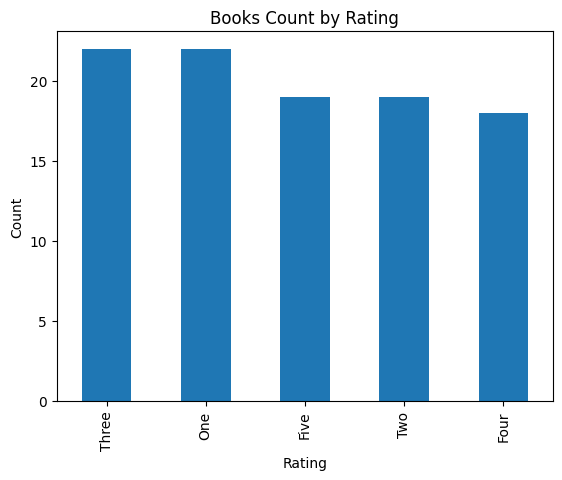

In [ ]:
# Visualization
import matplotlib.pyplot as plt

df["Rating"].value_counts().plot(kind="bar")
plt.title("Books Count by Rating")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


In [ ]:
# Scrape ALL Books (1000 Books)
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

# Base URL pattern
base_url = "http://books.toscrape.com/catalogue/page-{}.html"

# Empty lists to store data
titles = []
prices = []
ratings = []
availability_list = []

# Loop through all 50 pages
for page in range(1, 51):

    url = base_url.format(page)
    print(f"Scraping Page {page}...")

    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")

    books = soup.find_all("article", class_="product_pod")

    for book in books:

        # Title
        titles.append(book.h3.a["title"])

        # Price
        prices.append(book.find("p", class_="price_color").text)

        # Rating
        ratings.append(book.p["class"][1])

        # Availability
        availability_list.append(
            book.find("p", class_="instock availability").text.strip()
        )

    time.sleep(1)  # polite delay

# Create DataFrame
df = pd.DataFrame({
    "Title": titles,
    "Price": prices,
    "Rating": ratings,
    "Availability": availability_list
})

# Clean Price column
df["Price"] = df["Price"].str.replace("Â£", "").astype(float)

# Convert Rating to numeric
rating_map = {
    "One": 1,
    "Two": 2,
    "Three": 3,
    "Four": 4,
    "Five": 5
}

df["Rating"] = df["Rating"].map(rating_map)

# Save dataset
df.to_csv("all_books_dataset.csv", index=False)

print("\nScraping Completed!")
print("Total Books Scraped:", len(df))
df.head()


Scraping Page 1...
Scraping Page 2...
Scraping Page 3...
Scraping Page 4...
Scraping Page 5...
Scraping Page 6...
Scraping Page 7...
Scraping Page 8...
Scraping Page 9...
Scraping Page 10...
Scraping Page 11...
Scraping Page 12...
Scraping Page 13...
Scraping Page 14...
Scraping Page 15...
Scraping Page 16...
Scraping Page 17...
Scraping Page 18...
Scraping Page 19...
Scraping Page 20...
Scraping Page 21...
Scraping Page 22...
Scraping Page 23...
Scraping Page 24...
Scraping Page 25...
Scraping Page 26...
Scraping Page 27...
Scraping Page 28...
Scraping Page 29...
Scraping Page 30...
Scraping Page 31...
Scraping Page 32...
Scraping Page 33...
Scraping Page 34...
Scraping Page 35...
Scraping Page 36...
Scraping Page 37...
Scraping Page 38...
Scraping Page 39...
Scraping Page 40...
Scraping Page 41...
Scraping Page 42...
Scraping Page 43...
Scraping Page 44...
Scraping Page 45...
Scraping Page 46...
Scraping Page 47...
Scraping Page 48...
Scraping Page 49...
Scraping Page 50...

Scraping

,Title,Price,Rating,Availability
0,A Light in the Attic,51.77,3,In stock
1,Tipping the Velvet,53.74,1,In stock
2,Soumission,50.10,1,In stock
3,Sharp Objects,47.82,4,In stock
4,Sapiens: A Brief History of Humankind,54.23,5,In stock


In [ ]:
# Check dataset shape
df.shape

(1000, 4)

5) Exploratory Data Analysis (EDA)

In [ ]:
# Average Price
df["Price"].mean()

np.float64(35.07035)

In [ ]:
# Most common rating
df["Rating"].value_counts()

,count
Rating,
1,226
3,203
5,196
2,196
4,179


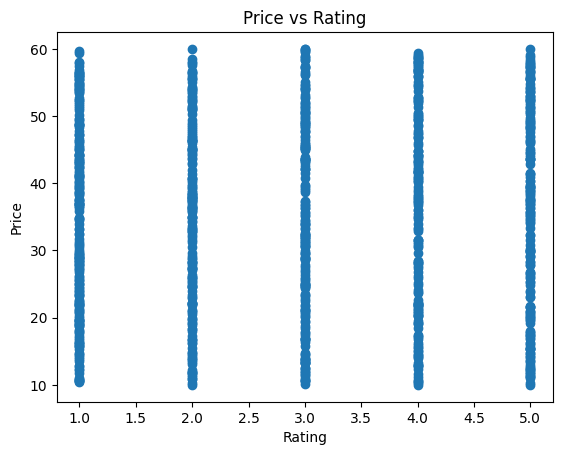

In [ ]:
# Price vs Rating plot
import matplotlib.pyplot as plt

plt.scatter(df["Rating"], df["Price"])
plt.xlabel("Rating")
plt.ylabel("Price")
plt.title("Price vs Rating")
plt.show()

**6) Key Insights**

  Majority of books are rated 3 and 4 stars.

  Most book prices fall between £20 and £50.

  No strong relationship observed between price and rating.

  Almost all books are available in stock.

In [ ]:
# Improve the Dataset (Data Cleaning & Feature Engineering)
rating_map = {
    "One": 1,
    "Two": 2,
    "Three": 3,
    "Four": 4,
    "Five": 5
}

df["Rating"] = df["Rating"].map(rating_map)


In [ ]:
# Advanced Analysis
# Correlation Analysis
print(df.corr(numeric_only=True))


           Price    Rating
Price   1.000000 -0.121741
Rating -0.121741  1.000000


In [ ]:
# Top 10 Most Expensive Books
df.sort_values("Price", ascending=False).head(10)


,Title,Price,Rating,Availability
68,The Death of Humanity: and the Case for Life,58.11,4,In stock
40,Slow States of Collapse: Poems,57.31,3,In stock
15,Our Band Could Be Your Life: Scenes from the A...,57.25,3,In stock
58,The Past Never Ends,56.50,4,In stock
57,The Pioneer Woman Cooks: Dinnertime: Comfort C...,56.41,1,In stock
91,Masks and Shadows,56.40,2,In stock
56,The Secret of Dreadwillow Carse,56.13,1,In stock
67,The Electric Pencil: Drawings from Inside Stat...,56.06,1,In stock
25,Birdsong: A Story in Pictures,54.64,3,In stock
4,Sapiens: A Brief History of Humankind,54.23,5,In stock


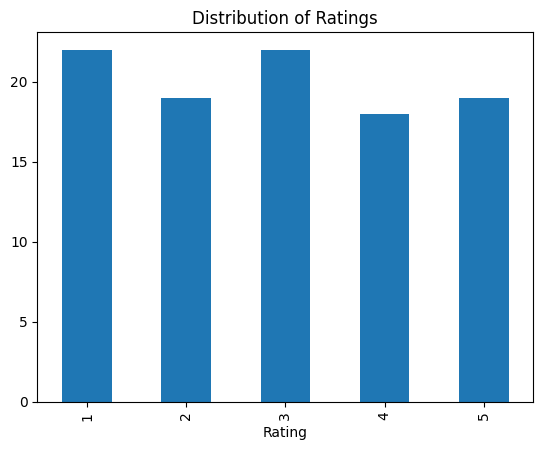

In [ ]:
# Rating Distribution Graph
import matplotlib.pyplot as plt

df["Rating"].value_counts().sort_index().plot(kind="bar")
plt.title("Distribution of Ratings")
plt.show()


**7) Learning Outcomes**

  ✔ Understood HTML structure

  ✔ Implemented web scraping using BeautifulSoup

  ✔ Handled pagination

  ✔ Performed data cleaning

  ✔ Conducted exploratory data analysis

  ✔ Generated meaningful insights

**8) Conclusion**

This project demonstrates how web scraping can be used to collect real-world data and perform data analysis.
The extracted dataset was cleaned and analyzed to identify patterns in pricing and ratings.

Web scraping combined with data analytics helps in understanding market trends and product distributions.